<a href="https://colab.research.google.com/github/tabassum-laz/Artificial-Intelligence-Lab/blob/main/AI_lab8_Null_value_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/AI lab/ML/Data/titanic_toy.csv')

In [5]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.describe()

,Age,Fare,Family,Survived
count,714.000000,846.000000,891.000000,891.000000
mean,29.699118,32.279338,0.904602,0.383838
std,14.526497,50.305796,1.613459,0.486592
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.206250,1.000000,1.000000
max,80.000000,512.329200,10.000000,1.000000


In [9]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X.shape

(891, 3)

In [10]:
#Using Pandas
#Remove the rows of empty cells
X1 =  X.dropna()
X1.shape

(675, 3)

In [11]:
#Replace null values with constant
X2 = X['Age'].fillna(100)

print(X['Age'].isnull().sum())
print(X2.isnull().sum())

177
0


In [12]:
#Replace null values with mean
X3=X['Age'].fillna(X['Age'].mean())

print(X['Age'].isnull().sum())
print(X3.isnull().sum())

177
0


In [13]:
##Replace null values with median
X4=X['Age'].fillna(X['Age'].median())

print(X['Age'].isnull().sum())
print(X4.isnull().sum())

177
0


In [14]:
X.var() #variance

Age        211.019125
Fare      2530.673077
Family       2.603248
dtype: float64

In [15]:
X3.var() #variance is reduced after mean

169.0523999372108

In [16]:
X4.var() #variance is reduced after median

169.51249827942345

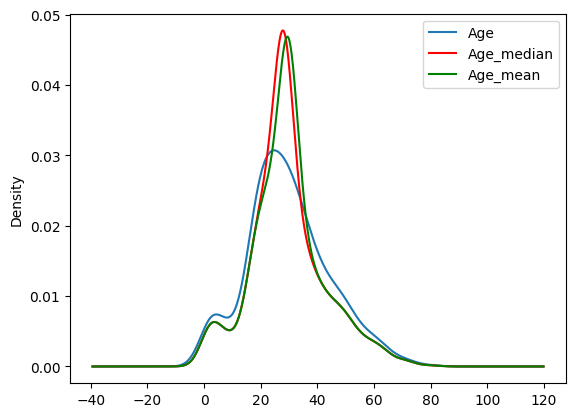

In [17]:
#PDF
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X4.plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X3.plot(kind='kde', ax=ax, color='green')

# add legends
labels = ['Age','Age_median', 'Age_mean']
ax.legend(labels, loc='best')

In [18]:
#Using Sklearn Imputer
from sklearn.impute import SimpleImputer

In [19]:
X = df[['Age', 'Fare', 'Family']]

In [20]:
#Replace null values with mean
imp1 = SimpleImputer(strategy='mean')
X[['Age']]= imp1.fit_transform(X[['Age']])
print(X[['Age']].isnull().sum())

Age    0
dtype: int64


In [21]:
imp1.statistics_   #mean value

array([29.69911765])

In [22]:
X[['Age']].mean()

Age    29.699118
dtype: float64

In [23]:
X[['Fare']].isnull().sum()

Fare    45
dtype: int64

In [24]:
##Replace null values with constant
imp2 = SimpleImputer(strategy='constant',fill_value=100)
X[['Fare']]= imp2.fit_transform(X[['Fare']])
print(X[['Fare']].isnull().sum())

Fare    0
dtype: int64


In [25]:
imp2.statistics_   #constant value

array([100.])

In [26]:
X = df[['Age', 'Fare', 'Family']]

In [27]:
from sklearn.compose import ColumnTransformer

trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='mean'),['Age']),
    ('imputer2',SimpleImputer(strategy='constant',fill_value=100),['Fare'])
],remainder='passthrough')

X_transformed = trf.fit_transform(X)
X_transformed = df = pd.DataFrame(X_transformed, columns = X.columns)

In [28]:
X.isnull().sum()

Age       177
Fare       45
Family      0
dtype: int64

In [29]:
X_transformed.isnull().sum()

Age       0
Fare      0
Family    0
dtype: int64